In [13]:
RANDOM_SEED = 0

In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data1 = pd.read_csv ('lemmatized-bestTranslate.csv')
data1.head (1)

,E/I,N/S,F/T,P/J,lemmatized
0,True,False,False,True,youtubevideo imglink enfp и intj момент youtub...


In [16]:
'''lstEI = []; lstNS = []; lstFT = []; lstPJ = []
for i in range (0, data1 ['type'].size):
    lstEI.append (data1.loc [i, 'type'] [0] == 'I')
    lstNS.append (data1.loc [i, 'type'] [1] == 'S')
    lstFT.append (data1.loc [i, 'type'] [2] == 'T')
    lstPJ.append (data1.loc [i, 'type'] [3] == 'J')

data1 ['E/I'] = lstEI
data1 ['N/S'] = lstNS
data1 ['F/T'] = lstFT
data1 ['P/J'] = lstPJ

data1 = data1.drop (columns=['type', 'without_url'])
data1.head ()'''

"lstEI = []; lstNS = []; lstFT = []; lstPJ = []\nfor i in range (0, data1 ['type'].size):\n    lstEI.append (data1.loc [i, 'type'] [0] == 'I')\n    lstNS.append (data1.loc [i, 'type'] [1] == 'S')\n    lstFT.append (data1.loc [i, 'type'] [2] == 'T')\n    lstPJ.append (data1.loc [i, 'type'] [3] == 'J')\n\ndata1 ['E/I'] = lstEI\ndata1 ['N/S'] = lstNS\ndata1 ['F/T'] = lstFT\ndata1 ['P/J'] = lstPJ\n\ndata1 = data1.drop (columns=['type', 'without_url'])\ndata1.head ()"

In [17]:
type1 = 'E/I'
if data1.__contains__ ('Unnamed: 0'):
    data1 = data1.drop (columns = ['Unnamed: 0'])
types = ['E/I', 'N/S', 'F/T', 'P/J']
types.remove (type1)

data1 = data1.drop (columns = types)
max_size = data1 [type1].value_counts ().max ()
lst = [data1]
for class_index, group in data1.groupby (type1):
    lst.append (group.sample (max_size - len (group), replace = True, random_state = RANDOM_SEED))
data1 = pd.concat (lst)

In [18]:
data = data1 ['lemmatized']
labels = data1 [type1]

In [19]:
trainData, testData, trainLabels, testLabels = train_test_split (data, labels, train_size = 0.8, random_state = RANDOM_SEED)
valData, testData, valLabels, testLabels = train_test_split (testData, testLabels, train_size = 0.5, random_state = RANDOM_SEED)

In [20]:
#import random
#lst = trainLabels.tolist ()
#for i in range (len (lst)):
#    if (lst [i] == True):
#        lst [i] = random.uniform (0.9, 1.0)
#    else:
#        lst [i] = random.uniform (0.0, 0.1)
#trainLabels = pd.DataFrame (lst)

In [21]:
encoder = tf.keras.layers.TextVectorization (max_tokens = 5000)
encoder.adapt (trainData)
vocab = np.array(encoder.get_vocabulary())

In [22]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional (tf.keras.layers.LSTM (64)),####tf.keras.layers.LSTM(64),#
    #tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [23]:
model.compile(loss='binary_crossentropy',#'mse',
              optimizer=tf.keras.optimizers.Adam(0.00003),
              metrics=['accuracy'])#metrics=['accuracy', 'mae'])#
#model.summary ()

In [24]:
h = model.fit(trainData, trainLabels, epochs = 20, validation_data=(valData, valLabels), shuffle = True)

Epoch 1/20
169/334 [==============>...............] - ETA: 9:22 - loss: 0.6933 - accuracy: 0.4985

KeyboardInterrupt: 

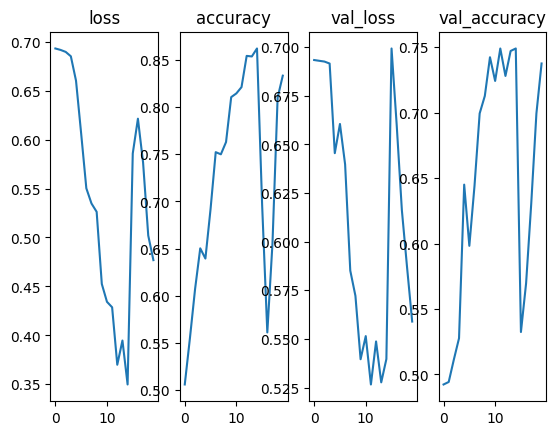

In [ ]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

histx = np.arange(0, len(h.history['loss']), 1)
ax1.plot(histx, h.history['loss'])
ax1.set_title("loss")

histx = np.arange(0, len(h.history['accuracy']), 1)
ax2.plot(histx, h.history['accuracy'])
ax2.set_title("accuracy")

histx = np.arange(0, len(h.history['val_loss']), 1)
ax3.plot(histx, h.history['val_loss'])
ax3.set_title("val_loss")

histx = np.arange(0, len(h.history['val_accuracy']), 1)
ax4.plot(histx, h.history['val_accuracy'])
ax4.set_title("val_accuracy")

plt.show ()

33/33 [==============================] - 6s 101ms/step
Accuracy:  0.7673975214489991
Precision:  0.7513711151736746
Recall:  0.791907514450867
F1:  0.771106941838649


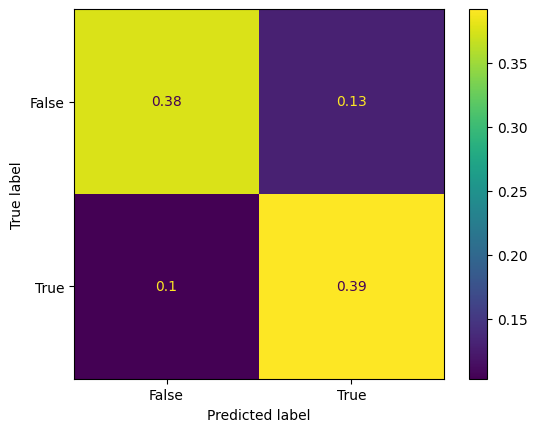

In [ ]:
def showMetrics (model, data1, labels1, threshold = False):
    prediction = model.predict (data1)
    if (threshold):
        preds = []
        for i in prediction:
            preds.append (i [0] >= 0.5)
        prediction = preds
    print ('Accuracy: ', accuracy_score (labels1, prediction))
    print ('Precision: ', precision_score (labels1, prediction))
    print ('Recall: ', recall_score (labels1, prediction))
    print ('F1: ', f1_score (labels1, prediction))
    ConfusionMatrixDisplay.from_predictions (labels1, prediction, normalize = 'all')
showMetrics (model, testData, testLabels, threshold = True)